<b> Name </b>  : Dnyaneshwari Gavhane <br>
<b> Batch </b> : PGA-46 <br>
<b> Project </b>: Capstone Project - I <br>
<b> E-mail </b> : dnyaneshwarigavhane11@gmail.com    

<center> 
  <h1> Used Cars Price Prediction </h1>
</center>

### Introduction:

The automotive industry has undergone significant transformations in recent years, with a surge in the popularity of used cars. As consumers seek reliable and cost-effective alternatives, the demand for accurate pricing models for used cars has become increasingly crucial. In response to this, this project focuses on predicting the prices of used cars based on various features and attributes.

### Problem Statement:

Pricing used cars is a multifaceted challenge influenced by factors such as make, model, mileage, year of manufacture, and additional features. Traditional methods often fall short in capturing the nuanced relationships between these variables, leading to inaccuracies in price estimation. Our goal is to leverage machine learning techniques to develop a robust and accurate price prediction model that assists both sellers and buyers in making informed decisions.

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

from sklearn.metrics import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Preprocessing

In [2]:
# Loading a used cars dataset
uc = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\Final_cars24_with_features.csv")

In [3]:
# Data Exporation
display(uc.head())
print("-"*127)
print(f"shape is {uc.shape}")
print("-"*127)
display(uc.info())

Color                  Name   Kms_Driven Owner    Fuel    RTO Tranmission  \
0  silver  2016 Mahindra XUV500    69,806 KM   2ND  DIESEL  KA-01      Manual   
1  silver  2017 Mahindra XUV500    63,295 KM   2ND  DIESEL  TN-12   Automatic   
2  silver     2017 Jeep Compass  1,11,538 KM   1ST  DIESEL  KA-03      Manual   
3  silver  2013 Mahindra XUV500    87,355 KM   1ST  DIESEL  KA-52      Manual   
4  silver  2014 Mahindra XUV500  1,34,062 KM   1ST  DIESEL  KA-04      Manual   

        Price     Body_type                 Variant  Airbags  Alloy_wheels  \
0   ₹9,18,000  luxury%20suv                W6Manual      1.0           NaN   
1  ₹11,55,000  luxury%20suv         W10 ATAutomatic      1.0           1.0   
2   ₹9,82,000  luxury%20suv  SPORT 2.0 DIESELManual      NaN           NaN   
3   ₹7,41,000  luxury%20suv                W8Manual      NaN           1.0   
4   ₹7,74,000  luxury%20suv                W6Manual      NaN           NaN   

   Cruise_control  Infotainment_system  Parking_sensors  Push_button_start  \
0             1.0                  NaN              1.0                NaN   
1             1.0                  NaN              1.0                1.0   
2             NaN                  NaN              NaN                NaN   
3             1.0                  NaN              1.0                NaN   
4             1.0                  NaN              1.0                NaN   

   Steering_mounted_controls  Sunroof_moonroof  
0                        1.0               NaN  
1                        1.0               1.0  
2                        NaN               NaN  
3                        1.0               NaN  
4                        1.0               NaN

-------------------------------------------------------------------------------------------------------------------------------
shape is (8164, 18)
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Color                      8164 non-null   object 
 1   Name                       8164 non-null   object 
 2   Kms_Driven                 8164 non-null   object 
 3   Owner                      8164 non-null   object 
 4   Fuel                       8164 non-null   object 
 5   RTO                        8164 non-null   object 
 6   Tranmission                8164 non-null   object 
 7   Price                      8164 non-null   object 
 8   Body_type                  8164 non-null   object 
 

None

In [4]:
# checking the nulls
uc.isnull().sum()[uc.isnull().sum()>0]

Airbags                      3867
Alloy_wheels                 5797
Cruise_control               7096
Infotainment_system          6459
Parking_sensors              4451
Push_button_start            6598
Steering_mounted_controls    4398
Sunroof_moonroof             7566
dtype: int64

In [5]:
# nulls to be filled with 0 as it indicates absence of the feature
uc.fillna(0, inplace=True)

In [6]:
# confirming no nulls in dataframe
uc.isnull().sum()[uc.isnull().sum()>0]

Series([], dtype: int64)

In [7]:
# Print unique items in dataset
for col in uc.select_dtypes(include = 'object').columns:
    if uc[col].nunique() <= 10:
        print(f"{col}-->{uc[col].nunique()} unique items-->{list(uc[col].unique())}")
        print("-"*98)
    else:
        print(f"{col}-->{uc[col].nunique()}  unique items-->{list(uc[col].head())}......{list(uc[col].tail())}")
        print("-"*98)

Color-->10 unique items-->['silver', 'white', 'red', 'blue', 'brown', 'black', 'purple', 'orange', 'yellow', 'green']
--------------------------------------------------------------------------------------------------
Name-->607  unique items-->['2016 Mahindra XUV500', '2017 Mahindra XUV500', '2017 Jeep Compass', '2013 Mahindra XUV500', '2014 Mahindra XUV500']......['2019 Hyundai New Elantra', '2016 Toyota Corolla Altis', '2018 Hyundai New Elantra', '2018 Toyota Corolla Altis', '2011 Toyota Corolla Altis']
--------------------------------------------------------------------------------------------------
Kms_Driven-->7863  unique items-->['69,806 KM', '63,295 KM', '1,11,538 KM', '87,355 KM', '1,34,062 KM']......['43,333 KM', '1,20,226 KM', '81,405 KM', '74,028 KM', '1,00,075 KM']
--------------------------------------------------------------------------------------------------
Owner-->4 unique items-->['2ND', '1ST', '3RD', '4TH']
----------------------------------------------------------

In [8]:
# Getting model_year, Brand name and model from Name column
uc['Model_Year'] = [i.split()[0] for i in uc.Name]
uc['Car_Name'] = [" ".join(i.split()[1:]) for i in uc.Name ]
uc = uc.drop('Name', axis = 1)

In [9]:
# Removing ',' and 'KM' from Distance column 
uc.Kms_Driven = uc.Kms_Driven.apply(lambda x:x.replace(',','').replace(' KM','')).astype(int)

In [10]:
# Removing ',' and '₹' from price column and coverting its unit in Lac rupees
uc.Price = uc.Price.apply(lambda x:x.replace(',','').replace('₹','')).astype(int)/100000

In [11]:
# converting 'luxury%20suv' to 'luxury suv' and 'luxury%20sedan' to 'luxury sedan'
uc.Body_type.replace({'luxury%20suv':'luxury suv', 'luxury%20sedan':'luxury sedan'}, inplace = True)

In [12]:
# removing Automatic and Manual from Varient column
uc.Variant = uc.Variant.apply(lambda x:x.replace('Manual','').replace('Automatic',''))

In [13]:
uc.Variant.nunique()

1022

In [14]:
uc = uc[['Car_Name','Model_Year', 'Variant', 'Fuel', 'Body_type', 'Tranmission', 'Color' , 'Owner' , 'Kms_Driven', 'RTO',
         'Airbags', 'Alloy_wheels', 'Cruise_control','Infotainment_system', 'Parking_sensors', 'Push_button_start',
         'Steering_mounted_controls', 'Sunroof_moonroof', 'Price']]

In [15]:
uc.to_excel('cleaned_cars24.xlsx', index = False)

In [16]:
# Data After Cleaning
display(uc.head())
print("-"*98)
print(f"shape is {uc.shape}")
print("-"*98)
display(uc.info())

Car_Name Model_Year           Variant    Fuel   Body_type  \
0  Mahindra XUV500       2016                W6  DIESEL  luxury suv   
1  Mahindra XUV500       2017            W10 AT  DIESEL  luxury suv   
2     Jeep Compass       2017  SPORT 2.0 DIESEL  DIESEL  luxury suv   
3  Mahindra XUV500       2013                W8  DIESEL  luxury suv   
4  Mahindra XUV500       2014                W6  DIESEL  luxury suv   

  Tranmission   Color Owner  Kms_Driven    RTO  Airbags  Alloy_wheels  \
0      Manual  silver   2ND       69806  KA-01      1.0           0.0   
1   Automatic  silver   2ND       63295  TN-12      1.0           1.0   
2      Manual  silver   1ST      111538  KA-03      0.0           0.0   
3      Manual  silver   1ST       87355  KA-52      0.0           1.0   
4      Manual  silver   1ST      134062  KA-04      0.0           0.0   

   Cruise_control  Infotainment_system  Parking_sensors  Push_button_start  \
0             1.0                  0.0              1.0                0.0   
1             1.0                  0.0              1.0                1.0   
2             0.0                  0.0              0.0                0.0   
3             1.0                  0.0              1.0                0.0   
4             1.0                  0.0              1.0                0.0   

   Steering_mounted_controls  Sunroof_moonroof  Price  
0                        1.0               0.0   9.18  
1                        1.0               1.0  11.55  
2                        0.0               0.0   9.82  
3                        1.0               0.0   7.41  
4                        1.0               0.0   7.74

--------------------------------------------------------------------------------------------------
shape is (8164, 19)
--------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Car_Name                   8164 non-null   object 
 1   Model_Year                 8164 non-null   object 
 2   Variant                    8164 non-null   object 
 3   Fuel                       8164 non-null   object 
 4   Body_type                  8164 non-null   object 
 5   Tranmission                8164 non-null   object 
 6   Color                      8164 non-null   object 
 7   Owner                      8164 non-null   object 
 8   Kms_Driven                 8164 non-null   int32  
 9   RTO                        8164 non-null   object 
 10

None

## Visualising the data

In [17]:
# Categorical Columns
uc.describe(include = 'object').T

count unique            top  freq
Car_Name     8164    124  Maruti Baleno   491
Model_Year   8164     14           2017  1144
Variant      8164   1022            VXI   822
Fuel         8164      3         PETROL  6393
Body_type    8164      5      hatchback  4805
Tranmission  8164      2         Manual  6386
Color        8164     10         silver  2806
Owner        8164      4            1ST  5718
RTO          8164    450          MH-12   343

In [18]:
# Numeric Columns
uc.describe()[['Kms_Driven','Price']]

Kms_Driven        Price
count  8.164000e+03  8164.000000
mean   5.484773e+04     5.949028
std    3.092203e+04     3.019407
min    0.000000e+00     1.060000
25%    3.156200e+04     3.980000
50%    5.240150e+04     5.390000
75%    7.569500e+04     7.110000
max    1.050066e+06    27.200000

In [19]:
uc.describe(exclude = 'object').T

count          mean           std   min       25%  \
Kms_Driven                 8164.0  54847.726972  30922.032975  0.00  31562.00   
Airbags                    8164.0      0.526335      0.499337  0.00      0.00   
Alloy_wheels               8164.0      0.289931      0.453758  0.00      0.00   
Cruise_control             8164.0      0.130818      0.337222  0.00      0.00   
Infotainment_system        8164.0      0.208844      0.406507  0.00      0.00   
Parking_sensors            8164.0      0.454802      0.497983  0.00      0.00   
Push_button_start          8164.0      0.191818      0.393755  0.00      0.00   
Steering_mounted_controls  8164.0      0.461293      0.498530  0.00      0.00   
Sunroof_moonroof           8164.0      0.073248      0.260560  0.00      0.00   
Price                      8164.0      5.949028      3.019407  1.06      3.98   

                                50%       75%        max  
Kms_Driven                 52401.50  75695.00  1050066.0  
Airbags                        1.00      1.00        1.0  
Alloy_wheels                   0.00      1.00        1.0  
Cruise_control                 0.00      0.00        1.0  
Infotainment_system            0.00      0.00        1.0  
Parking_sensors                0.00      1.00        1.0  
Push_button_start              0.00      0.00        1.0  
Steering_mounted_controls      0.00      1.00        1.0  
Sunroof_moonroof               0.00      0.00        1.0  
Price                          5.39      7.11       27.2

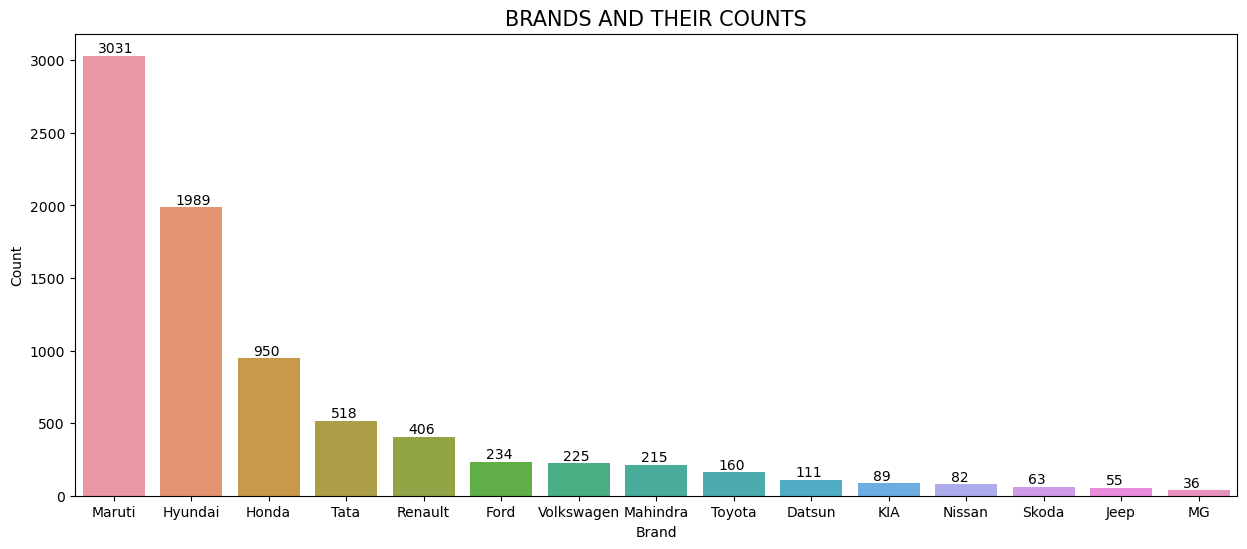

In [20]:
# Plotting Car brands and their count
df_car_brand = pd.DataFrame({'Brand':[x.split()[0] for x in uc.Car_Name],
                             'Model':[" ".join(x.split()[1:]) for x in uc.Car_Name],
                            'Price': uc.Price})
df_car_count = df_car_brand.groupby('Brand').Model.count().reset_index().sort_values('Model', ascending = False)
plt.figure(figsize = (15,6))
sns.barplot(data =df_car_count, x = 'Brand', y = 'Model')
plt.ylabel("Count")
plt.title("BRANDS AND THEIR COUNTS",size = 15)
for i,value in enumerate(df_car_count.Model):
    plt.text(i-0.2, value + 20, str(value));

#### Observations:
* Maruti dominates the market of used cars.
* Maruti and Hyundai covers more than 50% of the market in used cars.
* Maruti, Hyundai, Honda and Tata covers more than 80% of the used cars' market.
* MG and Jeep have less number of cars as compared to others

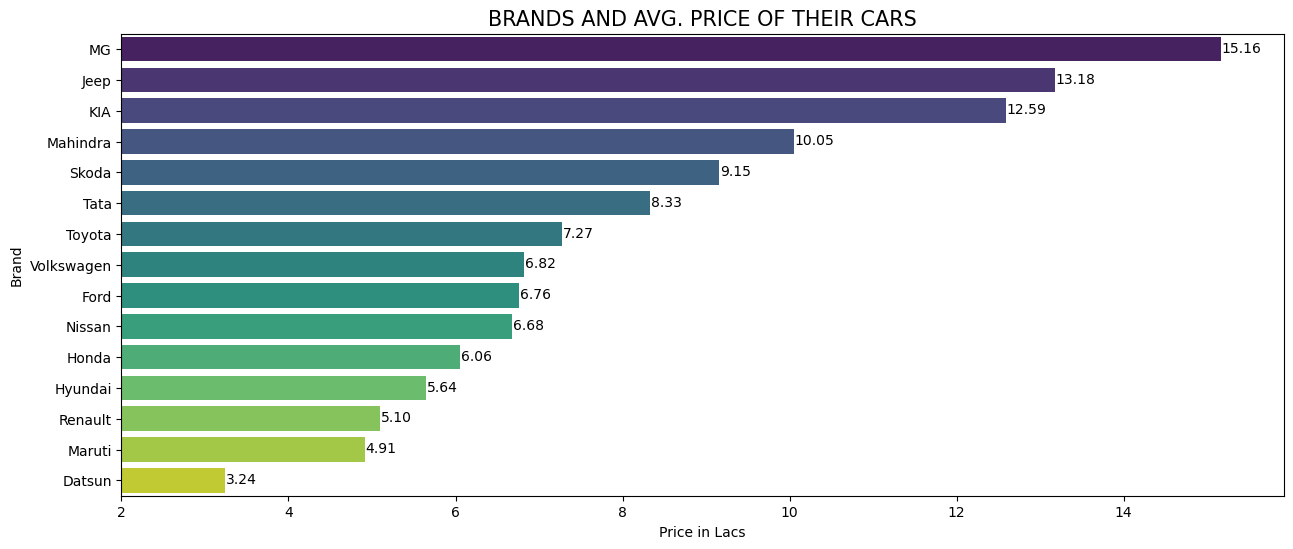

In [21]:
# Brands and avg price of their cars
df_car_and_price = df_car_brand.groupby('Brand').Price.mean().reset_index().sort_values('Price', ascending = False)
plt.figure(figsize = (15,6))
sns.barplot(data =df_car_and_price, y = 'Brand', x = 'Price', palette = 'viridis',orient = 'h')
plt.xlim(2)
for i,value in enumerate(df_car_and_price.Price):
    plt.text(value+0.01, i+0.1, f"{value:.2f}")
plt.xlabel("Price in Lacs")
plt.title("BRANDS AND AVG. PRICE OF THEIR CARS",size = 15);

#### Observations:
* Used Maruti and Datsun cars are more affordable.
* MG, Jeep & KIA cars are more expensive

In [22]:
# Car Brand and their models' share in the datset
fig = px.treemap(df_car_brand, path = [px.Constant("Used Cars Price"), 'Brand','Model'], 
                 values='Price',color_continuous_scale='RdBu',)
fig.show()

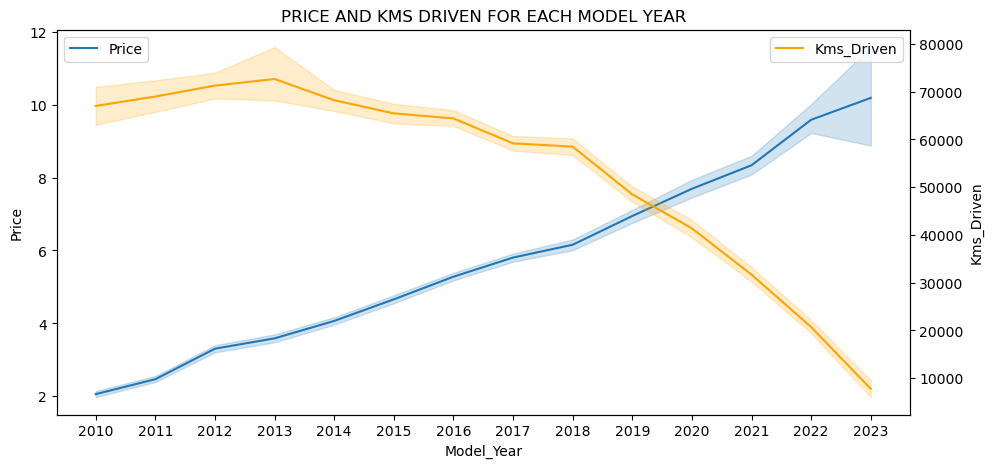

In [23]:
# Multivariate analysis of Price Kms_Driven and Model_Year
# PRICE AND KMS DRIVEN FOR EACH MODEL YEAR
plt.figure(figsize = (11,5))
df= uc.sort_values('Model_Year')
ax1 = sns.lineplot(x = df.Model_Year, y = df.Price, label = 'Price' )
ax2 = ax1.twinx()
sns.lineplot(x = df.Model_Year, y = df.Kms_Driven, color = 'orange', label='Kms_Driven', ax=ax2)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('PRICE AND KMS DRIVEN FOR EACH MODEL YEAR');

#### Observations:
* Newer cars are more expensive and price variation is also large as compared to old cars

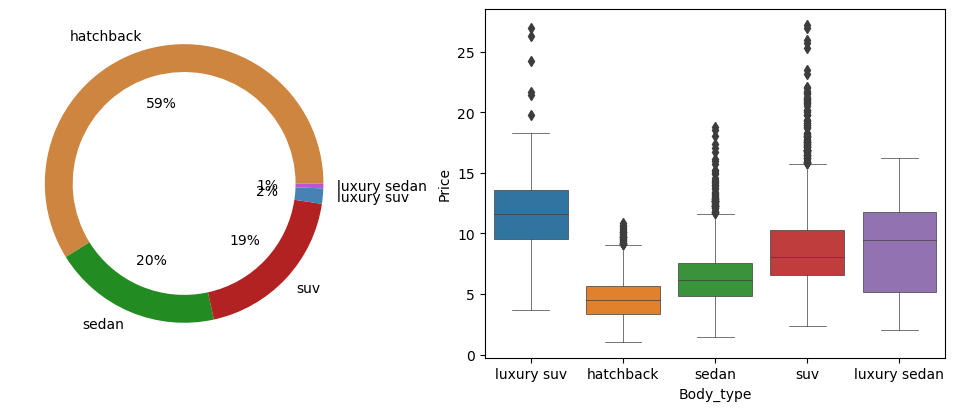

In [24]:
# BODYTYPE AND THEIR DISTRIBUTION
df1 = uc.Body_type.value_counts()
fig, ax = plt.subplots(ncols=2, figsize =(10 , 4), constrained_layout=True )  
ax[0].pie(x = df1, labels = df1.index, autopct='%1.0f%%', wedgeprops = dict(width = 0.2),
         colors = ['peru','forestgreen','firebrick','steelblue','mediumorchid']);
ax[1] = sns.boxplot(y= uc.Price, x=uc.Body_type,linewidth = 0.5);

#### Observations:
* more than 50% cars are hatchback and they are very affordable
* luxury suvs are most expensive cars

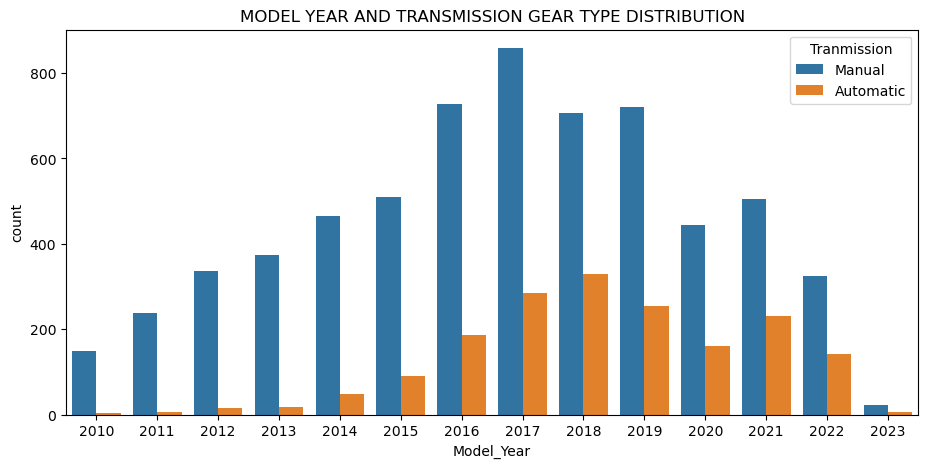

In [25]:
# MODEL YEAR AND TRANSMISSION GEAR TYPE DISTRIBUTION
plt.figure(figsize = (11,5))
df= uc.sort_values('Model_Year')
sns.countplot(x= 'Model_Year', data=df, hue = 'Tranmission')
plt.title("MODEL YEAR AND TRANSMISSION GEAR TYPE DISTRIBUTION");

#### Observations:
* most of the cars are of 2016 to 2019 Model year i.e. 4 to 7 years old
* Most of the cars are with Manual transimission gears

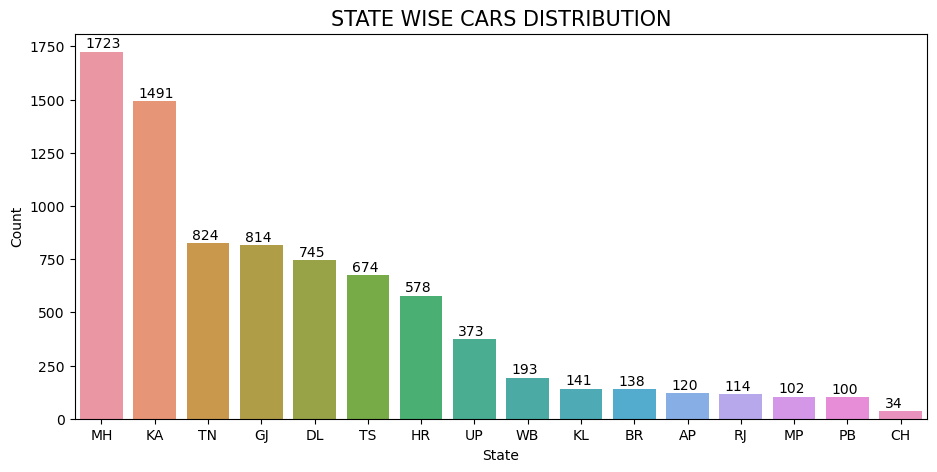

In [26]:
# STATE WISE CARS DISTRIBUTION
df_with_states = pd.DataFrame({'State':[x.split('-')[0] for x in uc.RTO],
                              'Price':uc.Price})
df_state_count = df_with_states.groupby('State').Price.count().reset_index().sort_values('Price', ascending = False)
plt.figure(figsize = (11,5))
sns.barplot(data =df_state_count, x = 'State', y = 'Price')
plt.ylabel("Count")
plt.title("STATE WISE CARS DISTRIBUTION",size = 15)
for i,value in enumerate(df_state_count.Price):
    plt.text(i-0.3, value + 20, str(value));

In [27]:
# PRICE DISTRIBUTION BY STATE
fig = px.box(df_with_states, x='State', y='Price', width=1020, height=500)
fig.update_layout(title='PRICE DISTRIBUTION BY STATE')
fig.show()

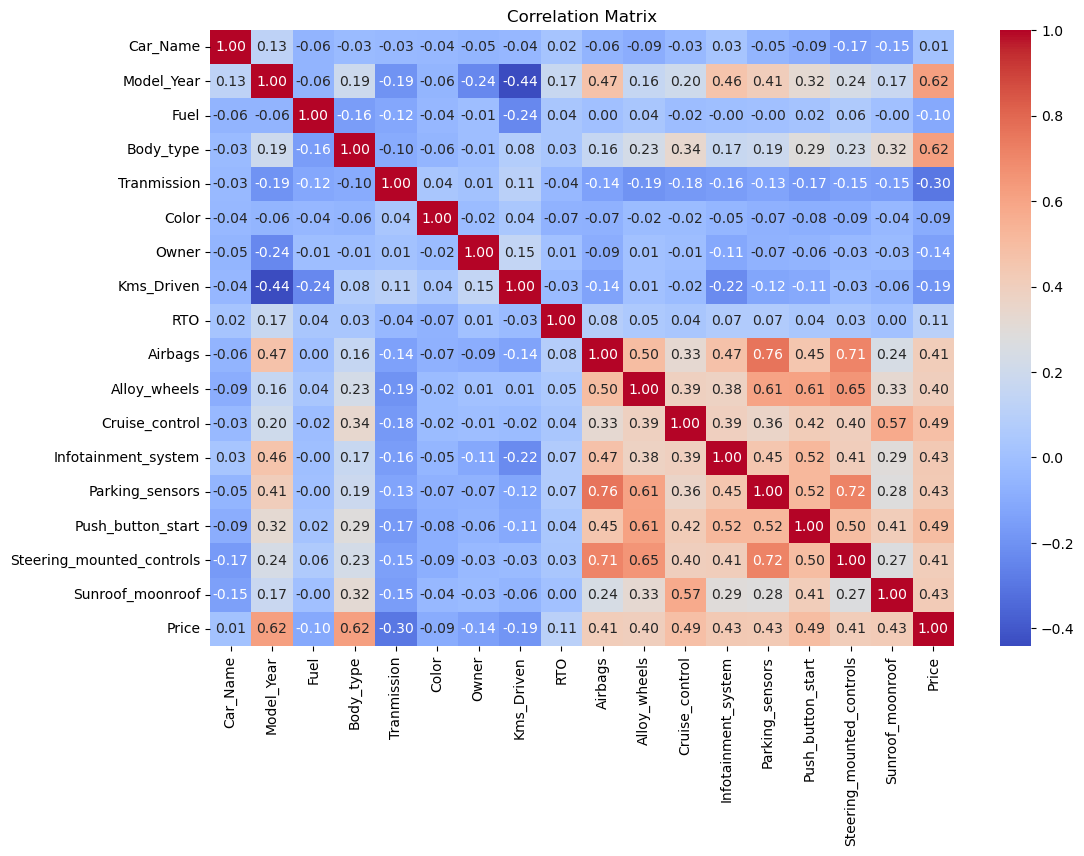

In [131]:
# Multivariate analysis: Heatmap for Correlation Matrix
correlation_matrix = uc.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show();

#### Observations:
* Maharashtra and Karnataka has high number of cars.
* In Kerala, Bihar, Andra Pradesh, Rajasthan, Madhya Pradesh, Panjab and Chandigarh has lowest number of used cars. More marketing at these state can implemented.
* Median price in all states is around 5 lacs

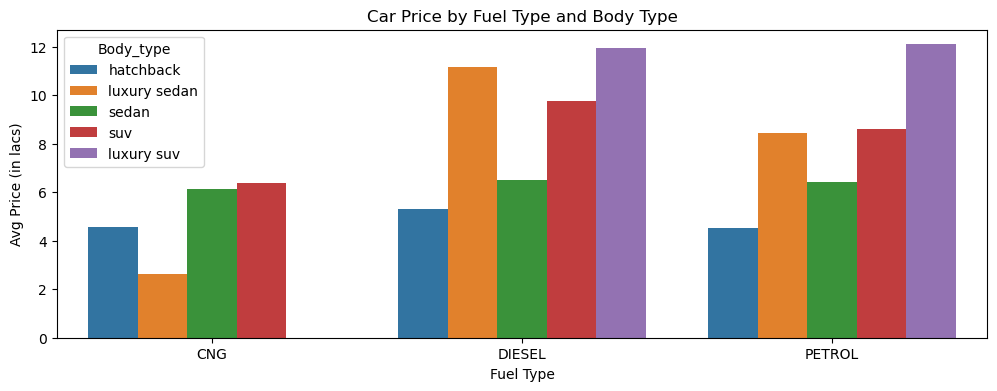

In [29]:
#Car Price by Fuel Type and Body Type
plt.figure(figsize=(12, 4))
fuel_body_price = uc.groupby(['Fuel','Body_type']).Price.mean().reset_index()
sns.barplot(x='Fuel', y='Price', hue='Body_type', data=fuel_body_price, ci=None)
plt.title('Car Price by Fuel Type and Body Type')
plt.xlabel('Fuel Type')
plt.ylabel('Avg Price (in lacs)');

#### Observations:
* CNG cars are more affordable in all Body_type categories
* Diesel and Petrol cars has almost equal price variation among Body_type categories

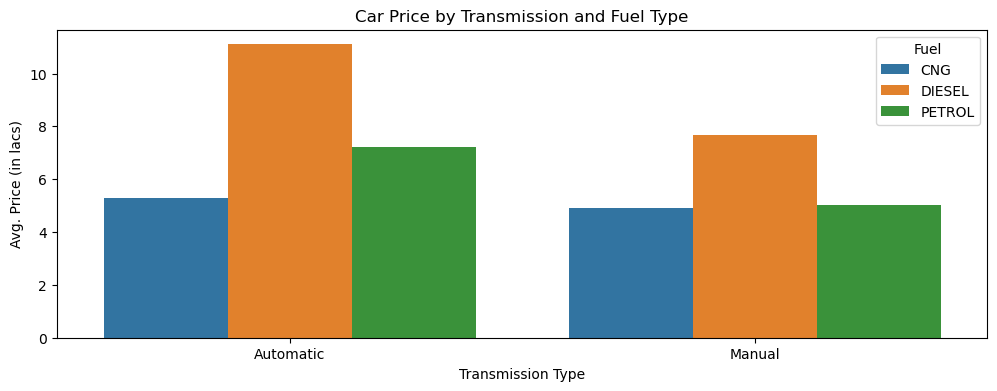

In [30]:
# Bivariate analysis: Transmission, Fuel, and Price
tran_fuel_price = uc.groupby(['Tranmission', 'Fuel']).Price.mean().reset_index()
plt.figure(figsize=(12, 4))
sns.barplot(x='Tranmission', y='Price', hue='Fuel', data=tran_fuel_price, ci=None)
plt.title('Car Price by Transmission and Fuel Type')
plt.xlabel('Transmission Type')
plt.ylabel('Avg. Price (in lacs)');

#### Observations:
* Automatic Transmission cars are more expensive in all fuel categories and in automatic transmission diesel car is most expensive.
* Avg price for CNG fuel type car is same for both manual and automatic transmission geartype cars.

In [31]:
# Distribution of Car Colors by Brand
df_car_brand = pd.DataFrame({'Brand':[x.split()[0] for x in uc.Car_Name],
                             'color':uc.Color,
                            'Price': uc.Price})
df_car_color_price = df_car_brand.groupby(['Brand','color']).Price.mean().reset_index().sort_values('Price', ascending = False)
df_car_color_count = df_car_brand.groupby(['Brand','color']).size().unstack(fill_value=0)

<Figure size 1200x400 with 0 Axes>

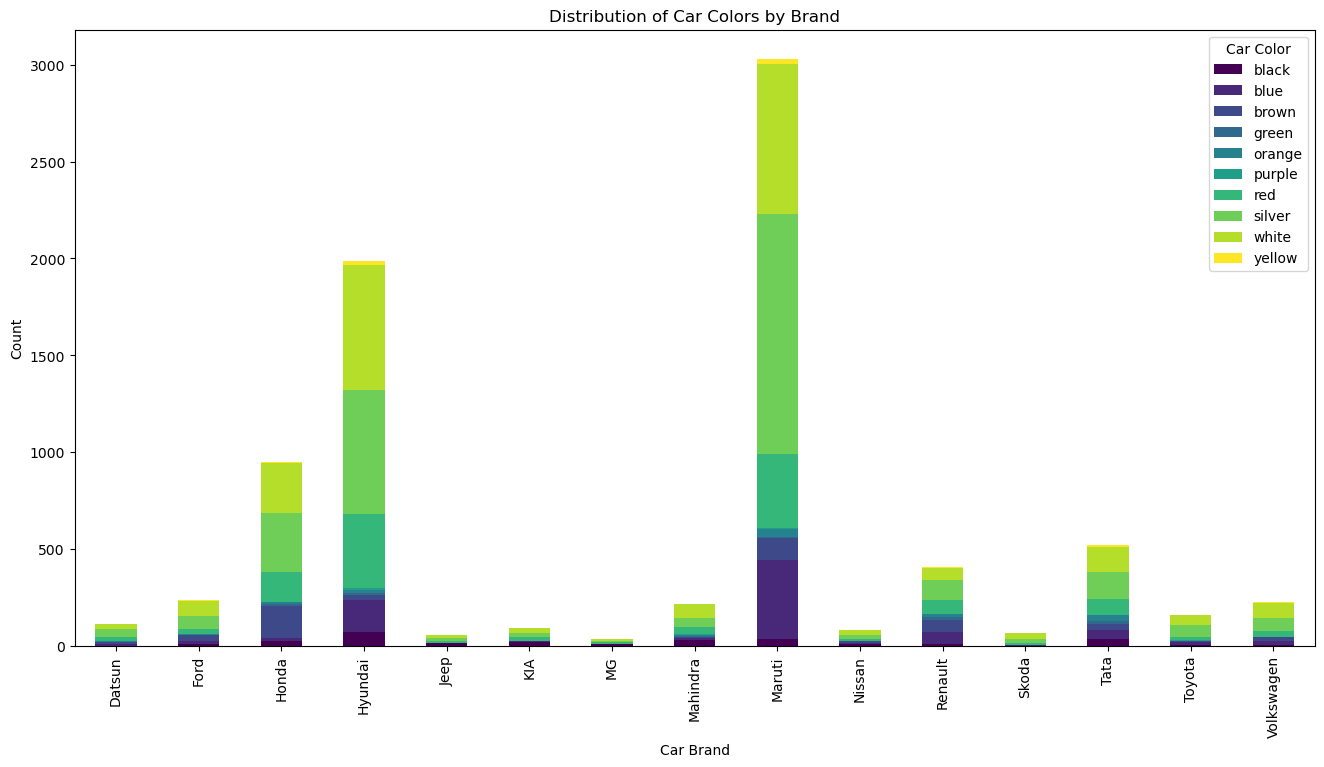

In [32]:
plt.figure(figsize = (12,4))
df_car_color_count.plot(kind='bar', stacked=True, colormap='viridis', figsize=(16, 8))

plt.title('Distribution of Car Colors by Brand')
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Car Color');

#### Observations:
*  In each brand most buyed colors are red, silver and white

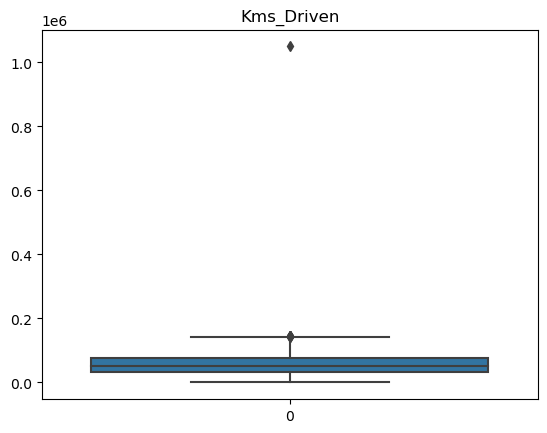

In [33]:
# visualizing Outlier from Kms_Driven
sns.boxplot(uc.Kms_Driven)
plt.title("Kms_Driven");

In [34]:
# only one record had Kms_Driven more than 20e4 so we are removing this outlier
uc = uc[~(uc.Kms_Driven > 20e4)]

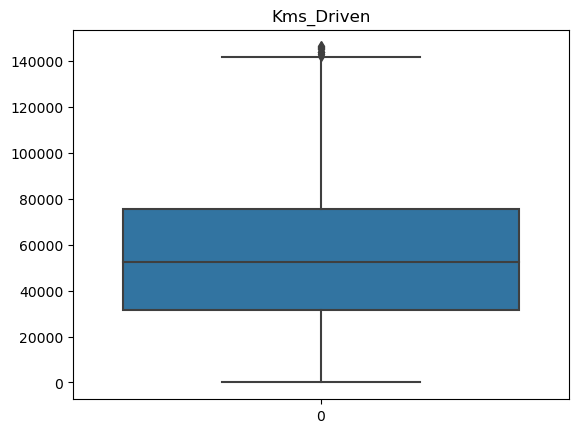

In [35]:
sns.boxplot(uc.Kms_Driven)
plt.title("Kms_Driven");

In [36]:
# Dropping the Variant Column as it will not be used for model building
uc = uc.drop('Variant', axis = 1)

In [37]:
# Converting Model_year's data type to int as it is in Object data type
uc.Model_Year = uc.Model_Year.astype(int)

In [38]:
# converting all the string values to lower case
uc[uc.select_dtypes(include='object').columns] = uc[uc.select_dtypes(include='object').columns].apply(lambda x:x.str.lower())

In [39]:
# Scaling the Kms_Driven using standard scaler
from sklearn.preprocessing import StandardScaler
scale_kmsd =StandardScaler()

In [40]:
uc.Kms_Driven = scale_kmsd.fit_transform(np.array(uc[['Kms_Driven']]))

In [41]:
uc.Kms_Driven

0       0.521927
1       0.296581
2       1.966276
3       1.129300
4       2.745835
          ...   
8159   -0.394306
8160    2.266969
8161    0.923370
8162    0.668051
8163    1.569541
Name: Kms_Driven, Length: 8163, dtype: float64

## Label Encoding:

In [42]:
from sklearn.preprocessing import LabelEncoder
le_Car_Name = LabelEncoder().fit(uc.Car_Name)
le_Fuel = LabelEncoder().fit(uc.Fuel)
le_Tranmission = LabelEncoder().fit(uc.Tranmission)
le_Color = LabelEncoder().fit(uc.Color)
le_RTO = LabelEncoder().fit(uc.RTO)

In [43]:
def label_encoding(df):
    """
    this function will take a data frame and convert 
    """
    df.Body_type.replace({'hatchback':0, 'sedan':1, 'suv':2, 'luxury sedan':3, 'luxury suv':4}, inplace = True)
    df.Owner.replace({'1st':1, '2nd':2, '3rd':3, '4th':4}, inplace = True)
    
    df.Car_Name = le_Car_Name.transform(df.Car_Name)
    df.Fuel = le_Fuel.transform(df.Fuel)
    df.Tranmission = le_Tranmission.transform(df.Tranmission)
    df.Color = le_Color.transform(df.Color)
    df.RTO = le_RTO.transform(df.RTO)
    
    return df

In [44]:
uc = label_encoding(uc)

In [45]:
# checking the 
uc.head()

Car_Name  Model_Year  Fuel  Body_type  Tranmission  Color  Owner  \
0        50        2016     1          4            1      7      2   
1        50        2017     1          4            0      7      2   
2        36        2017     1          4            1      7      1   
3        50        2013     1          4            1      7      1   
4        50        2014     1          4            1      7      1   

   Kms_Driven  RTO  Airbags  Alloy_wheels  Cruise_control  \
0    0.521927  111      1.0           0.0             1.0   
1    0.296581  316      1.0           1.0             1.0   
2    1.966276  113      0.0           0.0             0.0   
3    1.129300  152      0.0           1.0             1.0   
4    2.745835  114      0.0           0.0             1.0   

   Infotainment_system  Parking_sensors  Push_button_start  \
0                  0.0              1.0                0.0   
1                  0.0              1.0                1.0   
2                  0.0              0.0                0.0   
3                  0.0              1.0                0.0   
4                  0.0              1.0                0.0   

   Steering_mounted_controls  Sunroof_moonroof  Price  
0                        1.0               0.0   9.18  
1                        1.0               1.0  11.55  
2                        0.0               0.0   9.82  
3                        1.0               0.0   7.41  
4                        1.0               0.0   7.74

## Outlier Handling:

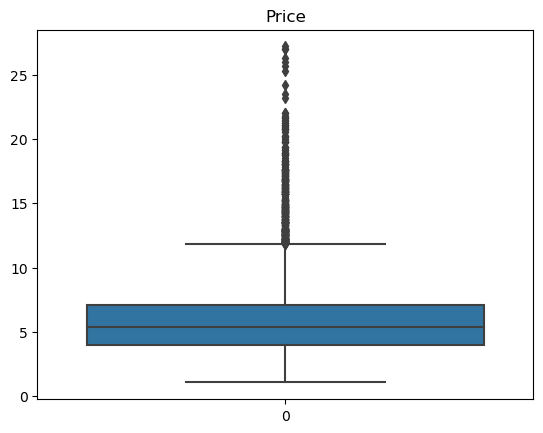

In [46]:
# box plot (Visualizing the outliers)
sns.boxplot(uc.Price)
plt.title("Price");

In [47]:
def remove_outliers(df, col, k):
    global df1
    mean = df[col].mean()
    sd = df[col].std()
    final_list = [x for x in df[col] if x > mean - k * sd]
    final_list = [x for x in final_list if x < mean + k * sd]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outliers removed ==>",df.shape[0] - df1.shape[0])
    print(f"new data is ranged from {df1[col].min()} to {df1[col].max()}")

In [48]:
remove_outliers(uc, 'Price', 3)

(8006, 18)
Number of outliers removed ==> 157
new data is ranged from 1.06 to 14.99


In [49]:
uc = df1

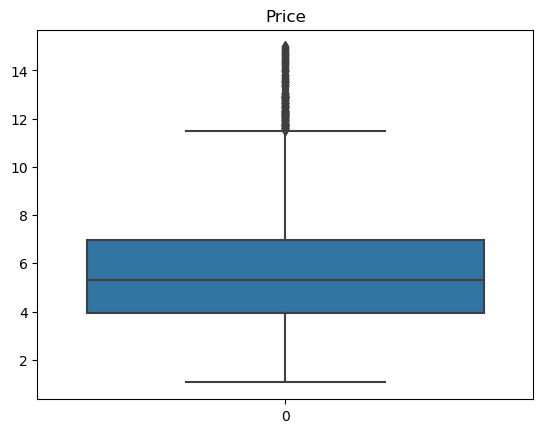

In [50]:
# box plot
sns.boxplot(uc.Price)
plt.title("Price");

## Random Sampling:

In [51]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(uc, test_size=0.2, random_state=870)

In [52]:
X_train = train.drop('Price', axis = 1)
y_train = train.Price

X_test = test.drop('Price', axis = 1)
y_test = test.Price

## Model Building:

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

In [54]:
eval_df = pd.DataFrame()
def check_model(model,comm ='base model', lin = False, imp_feat = False):
    global eval_df, pred_train, pred_test
    if imp_feat == True:
        xtr, ytr = X_train1, y_train1
        xts, yts = X_test1, y_test1
        comm = 'with feature selection'
    else:
        xtr, ytr = X_train, y_train
        xts, yts = X_test, y_test
        
    #model training and prediction
    model.fit(xtr, ytr)
    pred_train = model.predict(xtr)
    pred_test = model.predict(xts)
    # evaluation matrics
    train_score = model.score(xtr, ytr)
    test_score = model.score(xts, yts)
    N = xtr.shape[0]
    K = xtr.shape[1]
    Adj_R2 = 1 - ((1-train_score)*(N-1)/(N-K-1))

    mse_train = mean_squared_error(ytr, pred_train)
    rmse_train = np.sqrt(mse_train)
    mape_train = mean_absolute_percentage_error(ytr, pred_train)
    
    mse_test = mean_squared_error(yts, pred_test)
    rmse_test = np.sqrt(mse_test)
    mape_test = mean_absolute_percentage_error(yts, pred_test)
    # evaluation storing
    if str(model).find('CatBoostRegressor') != -1:
        model_name = 'CatBoost'
    else:
        model_name = str(model).split('Reg')[0].split('(')[0]
    temp = pd.DataFrame({'Model':model_name,'Comment': comm,
                         'R2_train':train_score,'Adj_R2':Adj_R2, 'R2_test':test_score,
                         'mse_train':mse_train,       'mse_test':mse_test,
                         'rmse_train':rmse_train,     'rmse_test':rmse_test,
                         'mape_train':mape_train,     'mape_test':mape_test}, index = [1])
    eval_df = pd.concat([temp,eval_df]).reset_index(drop = True)
    return eval_df.style.highlight_max(subset=['R2_train','R2_test'])\
            .highlight_min(subset=['mse_train','mse_test','rmse_train','rmse_test','mape_train','mape_test'])

## Linear Regression Model

In [55]:
lr = LinearRegression()

In [56]:
check_model(lr,lin=True)

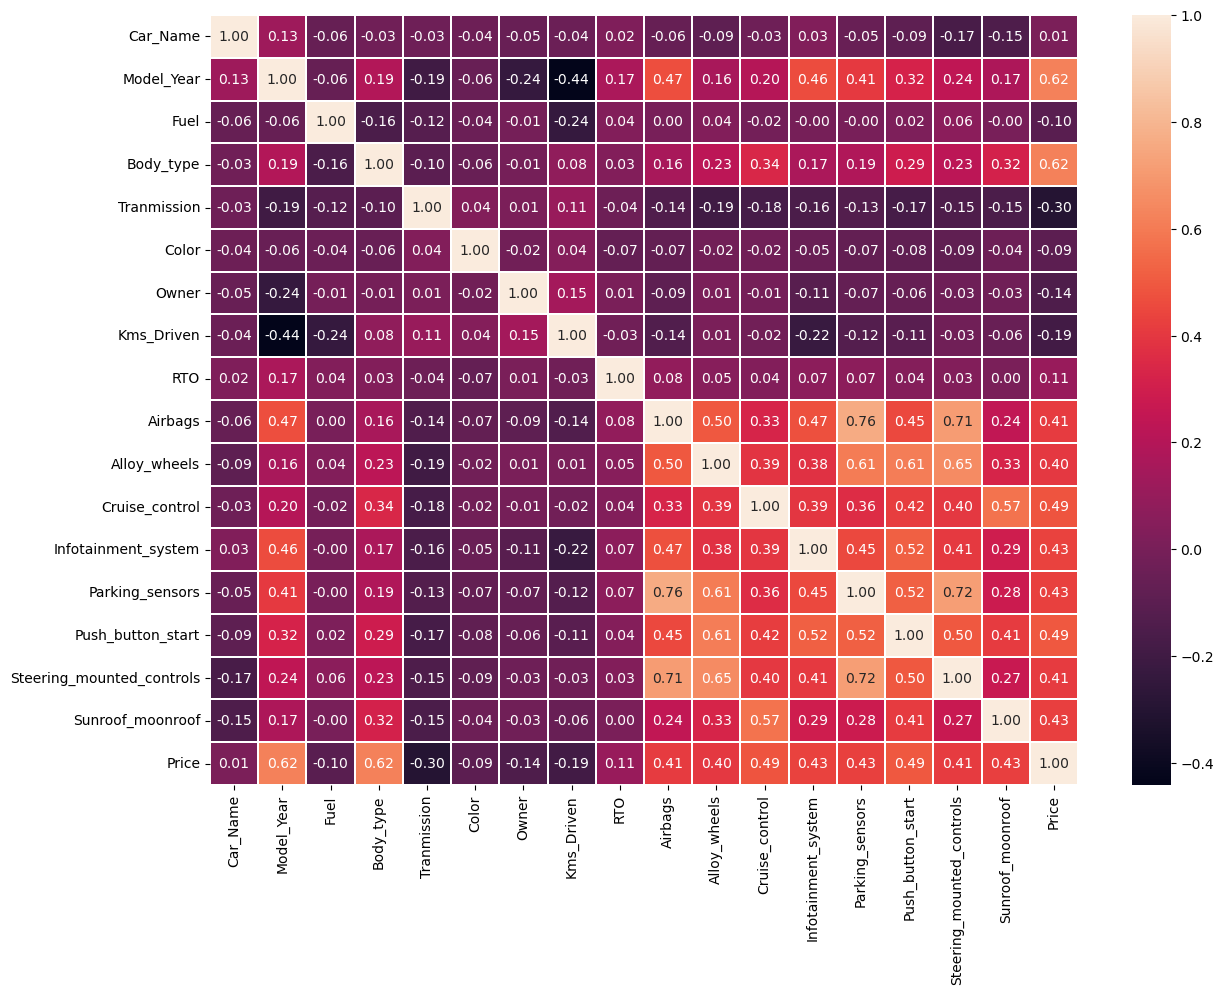

In [57]:
# checking assumptions
plt.figure(figsize = (14,10))
sns.heatmap(uc.corr(),annot = True,linewidths = 0.1, fmt='.2f');
# Parking_sensors, Airbags, Steering_mounted_controls have high correlation but its below 0.8

In [58]:
errors = y_train - pred_train

print(f"error mean = {errors.mean()}")
print(f"error skewness = {errors.skew()}")
print(f"Kurtosis = {errors.kurtosis()+3}")

error mean = -7.57578467998873e-14
error skewness = 0.7079356321931435
Kurtosis = 5.16801473313101


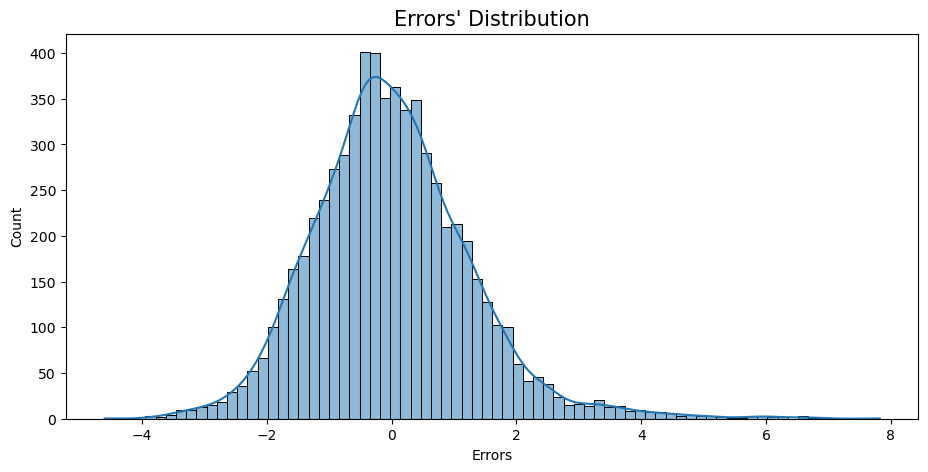

In [59]:
plt.figure(figsize = (11,5))
sns.histplot(errors,kde = True )
plt.title("Errors' Distribution", size = 15)
plt.xlabel("Errors");
# Error Terms are approximately normally distributed

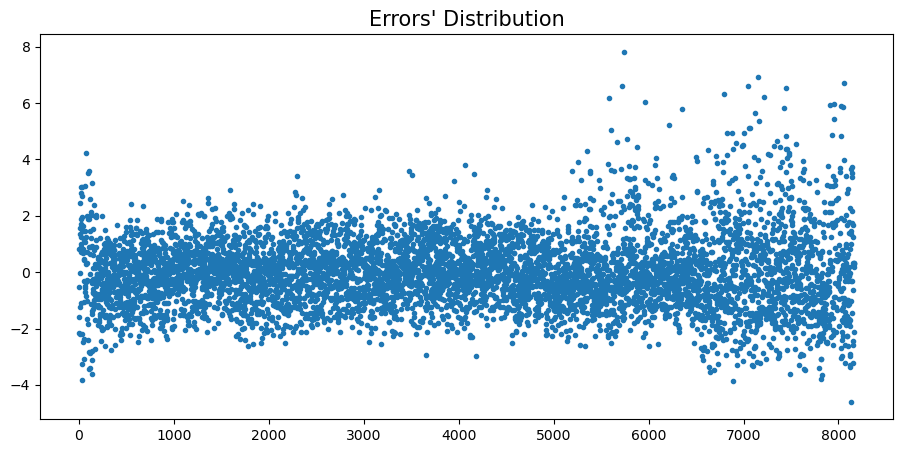

In [60]:
plt.figure(figsize = (11,5))
plt.plot(errors,'.')
plt.title("Errors' Distribution", size = 15);
# pattern in error terms

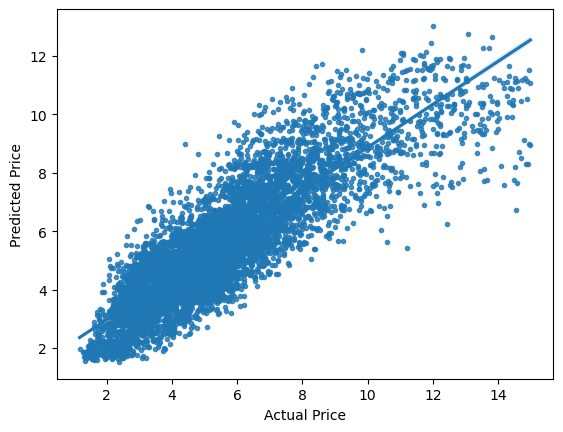

In [61]:
sns.regplot(x=y_train, y=pred_train, marker='.');
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price");
# variance is equal around regression line except for some predictions 

### Ridge Model:

In [62]:
ridge = Ridge()
check_model(ridge)

### Lasso Model:

In [63]:
lasso = Lasso(alpha = 0.01)
comment = str(lasso).split('(')[1].split(')')[0]
check_model(lasso, comment)

## Decision Tree Model:

In [64]:
dt = DecisionTreeRegressor()
check_model(dt)

### Decision Tree hyperparameter tunning with GridSearch

In [65]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor()
params = {'max_depth':range(1,20),
         'min_samples_split':[10,20,25,50,100,200]}

In [66]:
gs_dt = GridSearchCV(dt,param_grid = params, scoring='explained_variance',cv=10)
check_model(gs_dt,'dt_gs')

In [67]:
gs_dt.best_params_

{'max_depth': 19, 'min_samples_split': 25}

In [68]:
dt1 = DecisionTreeRegressor(min_samples_split=90)
comment = str(dt1).split('(')[1].split(')')[0]
check_model(dt1, comment)
# after Manually tunning the parameters, model with min_samples_split=90 gave the best results

#### Deciosion tree model observations
* With default hyperparameters Decision tree, model is overfitting as 100% r2score  on train data and poor results on test data
* With GridSearchCV model is overfitting as there is more than 5% difference in R2 score
* Currently got the best fit decision tree model with min_samples_split = 90

# Random Forest Model

In [69]:
rf = RandomForestRegressor()
check_model(rf)

In [70]:
rf = RandomForestRegressor()
params = {'n_estimators':[200, 250,300],
         'max_depth':[11,12,13,14],
         'min_samples_split':[10,20,30]}

In [144]:
gs_rf = GridSearchCV(rf,param_grid = params, scoring='explained_variance')
check_model(gs_rf,'rf_gs')

In [145]:
gs_rf.best_params_
# 'max_depth': 14, 'min_samples_split': 10, 'n_estimators': 300

{'max_depth': 14, 'min_samples_split': 10, 'n_estimators': 200}

In [72]:
rf1 = RandomForestRegressor(min_samples_split=40)

comment = str(rf1).split('(')[1].split(')')[0]
check_model(rf1, comment)
# min_samples_split=40 or 45 or 30

#### Random Forest model observations
* With default hyperparameters Random forest, model is overfitting as 99% r2score on train data and poor results on test data
* With GridSearchCV model is overfitting as there is more than 6% difference in R2 score 
* Currently got the best fit Random forest model with min_samples_split = 40

# SVM

In [73]:
svm = SVR(kernel = 'poly',degree=20 )
comment = str(svm).split('(')[1].split(')')[0]
check_model(svm, comment)

#### SVM model observations
* Model is not performing well with Support vector Machine Regression algorithm

# KNN

In [74]:
knn = KNeighborsRegressor(n_neighbors = 10)
comment = str(knn).split('(')[1].split(')')[0]
check_model(knn)

#### KNN model observations
* Model is not performing well with K Nearest Neighbour Regression algorithm

# AdaBoost

In [75]:
ada = AdaBoostRegressor()
check_model(ada)

#### Ada Boosting model observations
* Model is not performing well with AdaBoostRegressor algorithm

# GradientBoost

In [76]:
gb = GradientBoostingRegressor(learning_rate=0.2, n_estimators=200)
comment = str(gb).split('(')[1].split(')')[0]
check_model(gb, comment)

#### GradientBoost model observations
* Model is generalizing well with GradientBoostingRegressor algorithm with learning_rate=0.2, n_estimators=200
* Model Performance is also good

# CatBoost

In [77]:
cat = CatBoostRegressor(learning_rate=0.03,verbose= False, max_depth=5)
comment = 'learning_rate=0.03, max_depth=5'
check_model(cat,comment)
# Best model with learning_rate=0.03,verbose= False, max_depth=5

#### CatBoostRegressor model observations
* Model is generalizing well (most robust) with CatBoostRegressor algorithm with learning_rate=0.03, max_depth=5
* Model Performance is also good (slighly less than GradientBoostingRegressor)

## XGBoost

In [78]:
model = XGBRegressor(learning_rate=0.08)
comment = 'learning_rate=0.08'
check_model(model, comment)

#### XGBRegressor model observations
* Model is not generalizing well with XGBRegressor algorithm
* Model Performance is good

# Best Models

* CatBoost Regressor algorithm with learning_rate=0.03, max_depth=5 and GradientBoosting Regressor algorithm with learning_rate=0.2, n_estimators=200 are best performing models

* CatBoost Regressor model has slightly lower R square but it more robust than GradientBoosting Regressor model. 

# Model Building with Feature Selection

In [109]:
# Temporary workaround to alias np.int to int
import numpy as np
np.int = int
np.float = float
np.bool = bool

In [110]:
# Import necessary libraries
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

In [111]:
# Define the random forest regressor
rf = RandomForestRegressor()

In [112]:
boruta_feature_selector = BorutaPy(rf, max_iter= 10, verbose = 2)
# max_iter--< hyper parameter
# verbose --> it will give output after each iteration

In [113]:
# Load dataset and prepare the features and target variable
X = np.array(uc.drop('Price', axis=1))
y = np.array(uc.Price)

In [114]:
# Fit the Boruta feature selector to data
boruta_feature_selector.fit(X, y)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	8
Tentative: 	1
Rejected: 	8
Iteration: 	9 / 10
Confirmed: 	8
Tentative: 	1
Rejected: 	8


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	8
Tentative: 	0
Rejected: 	8


BorutaPy(estimator=RandomForestRegressor(n_estimators=1000,
                                         random_state=RandomState(MT19937) at 0x29DFA459540),
         max_iter=10, random_state=RandomState(MT19937) at 0x29DFA459540,
         verbose=2)

In [115]:
# Boruta has identified 8 features as important

In [116]:
boruta_imp_feat = pd.DataFrame({'Feature':uc.drop('Price', axis = 1).columns, 'imp':boruta_feature_selector.support_})

In [117]:
boruta_imp_feat[boruta_imp_feat.imp == True]

Feature   imp
0                    Car_Name  True
1                  Model_Year  True
3                   Body_type  True
4                 Tranmission  True
7                  Kms_Driven  True
8                         RTO  True
11             Cruise_control  True
15  Steering_mounted_controls  True

In [118]:
top8_feat = list(boruta_imp_feat[boruta_imp_feat.imp == True].Feature)
top8_feat.append('Price')

#### Visualizing Best features using random forest algorithm

In [120]:
Feat_imp_df = pd.DataFrame({'features':X_train.columns,'imp':rf1.feature_importances_})
Feat_imp_df = Feat_imp_df.sort_values('imp', ascending = False)

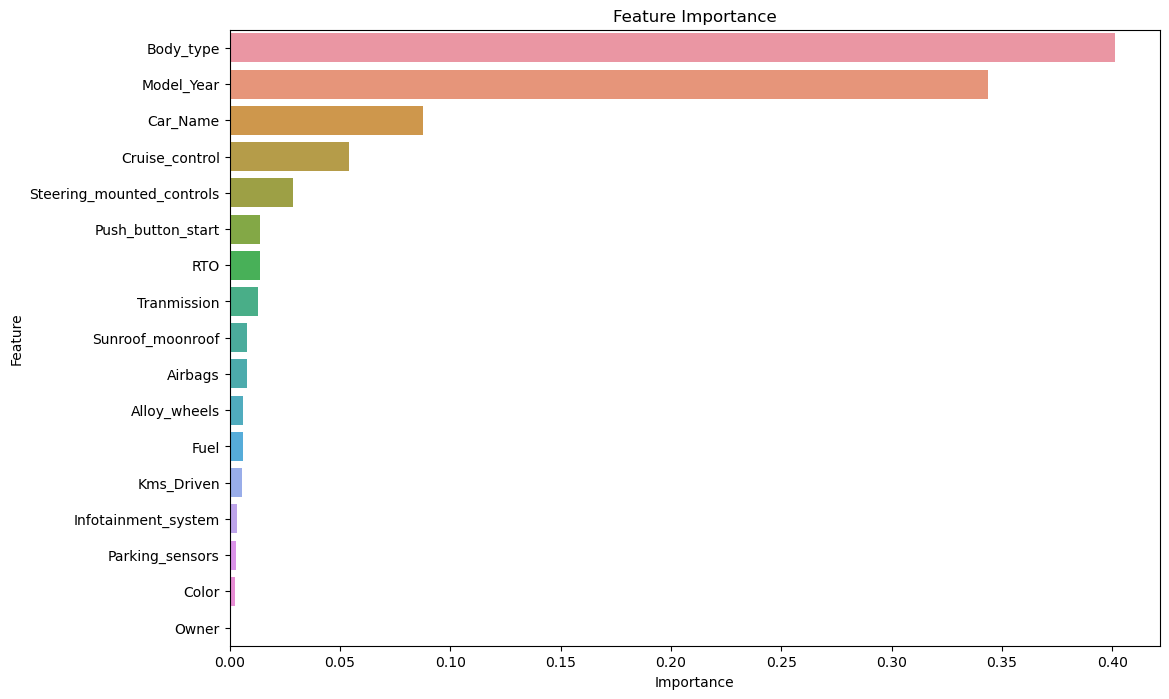

In [121]:
plt.figure(figsize = (12,8))
sns.barplot(data=Feat_imp_df, x = 'imp', y = 'features')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature");

In [122]:
top8_feat = ['Car_Name', 'Model_Year', 'Body_type', 'Tranmission', 'Kms_Driven', 
              'RTO', 'Cruise_control', 'Steering_mounted_controls', 'Price']

In [123]:
uc_top8 = uc[top8_feat]

In [124]:
train1, test1 = train_test_split(uc_top8, test_size=0.2, random_state=870)

In [125]:
X_train1 = train1.drop('Price', axis = 1)
y_train1 = train1.Price
print(f"shape of X_train1 is {X_train1.shape} \nshape of y_train1 is {y_train1.shape}")

shape of X_train1 is (6404, 8) 
shape of y_train1 is (6404,)


In [126]:
X_test1 = test1.drop('Price', axis = 1)
y_test1 = test1.Price
print(f"shape of X_test1 is {X_test1.shape} \nshape of y_test1 is {y_test1.shape}")

shape of X_test1 is (1602, 8) 
shape of y_test1 is (1602,)


## GradientBoost

In [128]:
gb = GradientBoostingRegressor(learning_rate=0.4, n_estimators=200)
comment = 'learning_rate=0.4, n_estimators=200'
check_model(gb, comment , imp_feat = True)

## CatBoost

In [130]:
cat = CatBoostRegressor(learning_rate=0.045,verbose= False, max_depth=5,)
# comment = 'learning_rate=0.045, max_depth=5'
check_model(cat,comment, imp_feat = True)
# Best model with learning_rate=0.03,verbose= False, max_depth=5

# Final Model
* final model is CatBoostRegressor(learning_rate=0.045,verbose= False, max_depth=5,)

## Model Export

In [138]:
# model dump
pickle.dump(cat, open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud.pkl", 'wb'))

In [139]:
# dumping LabelEncoders
pickle.dump(le_Car_Name, open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\le_Car_Name.pkl", 'wb'))
pickle.dump(le_Fuel, open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\le_Fuel.pkl", 'wb'))
pickle.dump(le_Tranmission, open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\le_Tranmission.pkl", 'wb'))
pickle.dump(le_Color, open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\le_Color.pkl", 'wb'))
pickle.dump(le_RTO, open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\le_RTO.pkl", 'wb'))

# dumping standardscaler
pickle.dump(scale_kmsd, open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\scale_kmsd.pkl", 'wb'))

In [140]:
# only below features are needed to get the price
#'Car_Name', 'Model_Year', 'Body_type', 'Tranmission', 'Kms_Driven', 
#'RTO', 'Cruise_control', 'Steering_mounted_controls', 'Price'

## Building A function to predict a used car price

In [142]:
def pridict_cars24():
    import pickle
    # model
    cat_final = pickle.load(open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud.pkl",'rb'))
    # Loading LabelEncoders
    le_Car_Name = pickle.load(open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\le_Car_Name.pkl", 'rb'))
    le_Tranmission = pickle.load(open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\le_Tranmission.pkl", 'rb'))
    le_RTO = pickle.load(open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\le_RTO.pkl", 'rb'))

    # Loading standardscaler
    scale_kmsd = pickle.load(open(r"C:\Users\ADMIN\OneDrive\Desktop\carcloud\scale_kmsd.pkl", 'rb'))
    
    Car_Name = input("Enter the car name with model: ").strip().lower()
    Model_Year = int(input("Enter the car model_year: " ))
    Body_type = input("Enter the Body_type: ").strip().lower()
    Tranmission = input("Enter the Tranmission: ").strip().lower()
    Kms_Driven = int(input("Enter kilometers driven: " ))
    RTO = input("Enter the RTO: ").strip().lower()
    Cruise_control = int(input("is Cruise_control available (1 for yes and 0 for no): " ))
    Steering_mounted_controls = int(input("are Steering_mounted_controls available (1 for yes and 0 for no): " ))
    
    Body_type_dict = {'hatchback':0, 'sedan':1, 'suv':2, 'luxury sedan':3, 'luxury suv':4}
    
    Car_Name = le_Car_Name.transform([Car_Name])[0]
    Body_type = Body_type_dict[Body_type]
    Tranmission = le_Tranmission.transform([Tranmission])[0]
    Kms_Driven = scale_kmsd.transform(np.array([[Kms_Driven]]))[0][0]
    RTO = le_RTO.transform([RTO])[0]
    
    ip = pd.DataFrame({'Car_Name':Car_Name,'Model_Year':Model_Year,'Body_type':Body_type, 'Tranmission':Tranmission,
                      'Kms_Driven':Kms_Driven,'RTO':RTO, 'Cruise_control':Cruise_control,
                      'Steering_mounted_controls':Steering_mounted_controls}, index = [0])
    return f"Car price will be around {cat_final.predict(ip)[0]:.2f} lacs"

In [143]:
pridict_cars24()

Enter the car name with model: Jeep Compass
Enter the car model_year: 2017
Enter the Body_type: luxury suv
Enter the Tranmission: manual
Enter kilometers driven: 10000
Enter the RTO: mh-14
is Cruise_control available (1 for yes and 0 for no): 1
are Steering_mounted_controls available (1 for yes and 0 for no): 1


'Car price will be around 11.63 lacs'